# Previsão de Churn

### Discente(s):

    Bruno Antonio dos Santos Bezerra
    Erick Vinicius Rebouças Cruz
    Gabriel Monteiro Lobão

### Framework:
    TensorFlow/Keras

### Requerimentos:
    1. Python 3.9
    2. Tensorflow (conda install -c conda-forge tensorflow-gpu=2.10)
    3. Pandas
    4. Matplotlib
    5. Sklearn
    6. Numpy
    7. Dataset: https://www.kaggle.com/datasets/kapturovalexander/customers-churned-in-telecom-services

### Etapas do Projeto:
    1. Carregamento e Exploração dos Dados
    2. Pré-processamento
    3. Otimização de Hiperparâmetros com Optuna
    4. Analisando dados encontrados
    5. Criação do Modelo KAN ()
    6. Treinamento e Validação do Modelo
    7. Avaliação e Previsões
    8. Previsão Futura (Exemplo)




# 1. Importação de Bibliotecas e dados

In [ ]:
import numpy as np # Manipulação de dados numéricos e estruturados.
import pandas as pd
import matplotlib.pyplot as plt # Geração de gráficos.
from sklearn.preprocessing import StandardScaler # Normalização dos dados.
from sklearn.preprocessing import OneHotEncoder # Codificação de variáveis categóricas.

import optuna # Otimização de hiperparâmetros.
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # Algoritmo de otimização para treinar a rede neural.
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import r2_score # Avaliação da precisão do modelo.

import seaborn as sns # Visualização de dados.
#testando

/home/yienvee/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-24 07:51:05.943759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [117]:
df = pd.read_csv('data/customer_churn_telecom_services.csv')
print(df.shape)
df.head()


# One hot encoding

# M de N, 
# Outra técnica comum para lidar com variáveis categóricas é a codificação one-hot.
# A codificação one-hot é uma técnica que converte variáveis categóricas em vetores binários.
# Cada valor da variável categórica é convertido em um novo valor binário.
# Isso permite que o modelo aprenda a diferença entre diferentes categorias.
# Outra opção é usar a função get_dummies do pandas. M de N


(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
data_positive = df[df['Churn'] == 1]
data_negative = df[df['Churn'] == 0]
df['SeniorCitizen'].unique()

/tmp/ipykernel_3478/1637295412.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


array([0, 1])

# 2. Analise dos dados

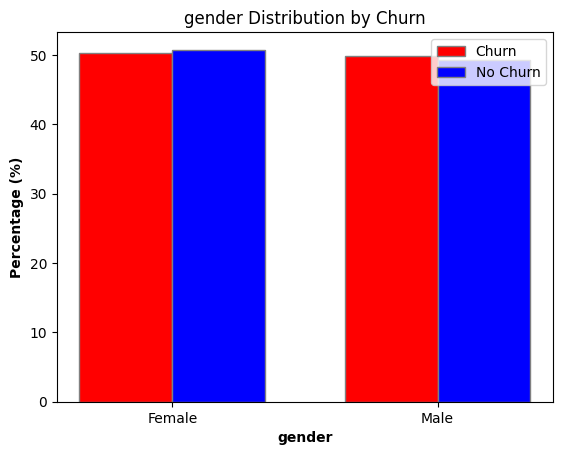

In [119]:
import numpy as np

# Contagem de valores de gênero para churn positivo e negativo
positive_gender_counts = data_positive['gender'].value_counts()
negative_gender_counts = data_negative['gender'].value_counts()

# Calculando as porcentagens
total_positive = positive_gender_counts.sum()
total_negative = negative_gender_counts.sum()

positive_gender_percent = (positive_gender_counts / total_positive) * 100
negative_gender_percent = (negative_gender_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_gender_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_gender_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_gender_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('gender', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_gender_percent))], positive_gender_percent.index)
plt.title('gender Distribution by Churn')
plt.legend()
plt.show()

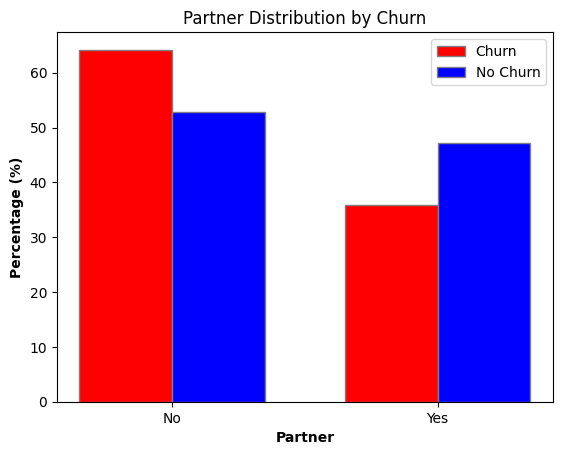

In [120]:
import numpy as np

# Contagem de valores de gênero para churn positivo e negativo
positive_partner_counts = data_positive['Partner'].value_counts()
negative_partner_counts = data_negative['Partner'].value_counts()

# Calculando as porcentagens
total_positive = positive_partner_counts.sum()
total_negative = negative_partner_counts.sum()

positive_partner_percent = (positive_partner_counts / total_positive) * 100
negative_partner_percent = (negative_partner_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_partner_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_partner_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_partner_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_partner_percent))], positive_partner_percent.index)
plt.title('Partner Distribution by Churn')
plt.legend()
plt.show()

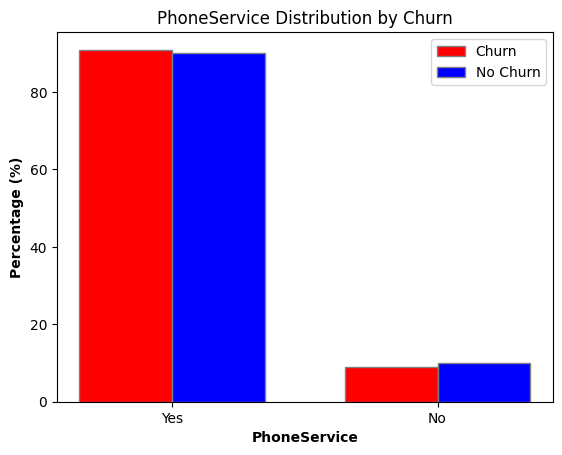

In [121]:
# Contagem de valores de gênero para churn positivo e negativo
positive_PhoneService_counts = data_positive['PhoneService'].value_counts()
negative_PhoneService_counts = data_negative['PhoneService'].value_counts()

# Calculando as porcentagens
total_positive = positive_PhoneService_counts.sum()
total_negative = negative_PhoneService_counts.sum()

positive_PhoneService_percent = (positive_PhoneService_counts / total_positive) * 100
negative_PhoneService_percent = (negative_PhoneService_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_PhoneService_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_PhoneService_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_PhoneService_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('PhoneService', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_PhoneService_percent))], positive_PhoneService_percent.index)
plt.title('PhoneService Distribution by Churn')
plt.legend()
plt.show()

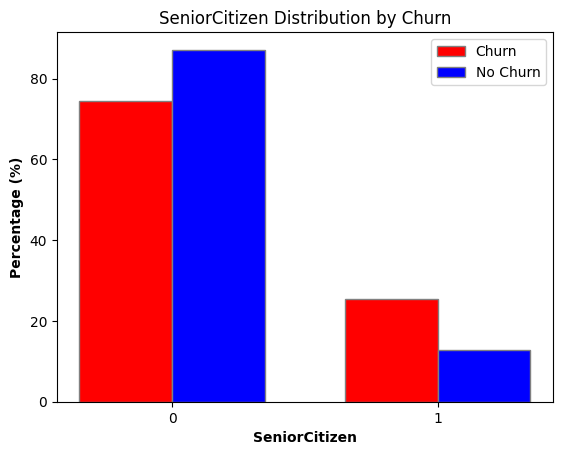

In [122]:
# Contagem de valores de gênero para churn positivo e negativo
positive_SeniorCitizen_counts = data_positive['SeniorCitizen'].value_counts()
negative_SeniorCitizen_counts = data_negative['SeniorCitizen'].value_counts()

# Calculando as porcentagens
total_positive = positive_SeniorCitizen_counts.sum()
total_negative = negative_SeniorCitizen_counts.sum()

positive_SeniorCitizen_percent = (positive_SeniorCitizen_counts / total_positive) * 100
negative_SeniorCitizen_percent = (negative_SeniorCitizen_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_SeniorCitizen_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_SeniorCitizen_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_SeniorCitizen_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('SeniorCitizen', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_SeniorCitizen_percent))], positive_SeniorCitizen_percent.index)
plt.title('SeniorCitizen Distribution by Churn')
plt.legend()
plt.show()

# 3. Pre-processamento de dados

In [123]:
df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']] = df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].replace({'Yes': 1, 'No': 0})
df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df['gender'] = df['gender'].replace({'Female':1, 'Male':0})
#df['InternetService'] = df['InternetService'].replace({'Fiber optic': 2, 'DSL': 1 , 'No': 0})
df['MultipleLines'] =  df['MultipleLines'].replace({'No phone service': -1})
df.head()

/tmp/ipykernel_3478/1775762302.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']] = df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].replace({'Yes': 1, 'No': 0})
/tmp/ipykernel_3478/1775762302.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'Device

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [130]:
colunas = ['PaymentMethod', 'Contract', 'InternetService']
ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(df[colunas]).toarray()
dados = pd.concat([df, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(colunas))], axis=1)

dados2 = dados.drop(colunas, axis=1)
data = dados2
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,-1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
7040,1,0,1,1,11,0,-1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [125]:
data['PhoneService'].unique()

array([0, 1])

In [132]:
data = data.fillna(0)

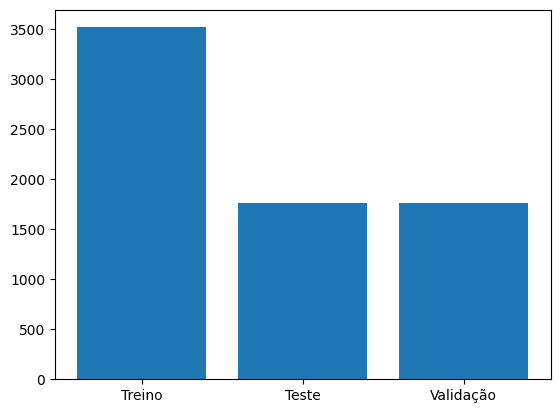

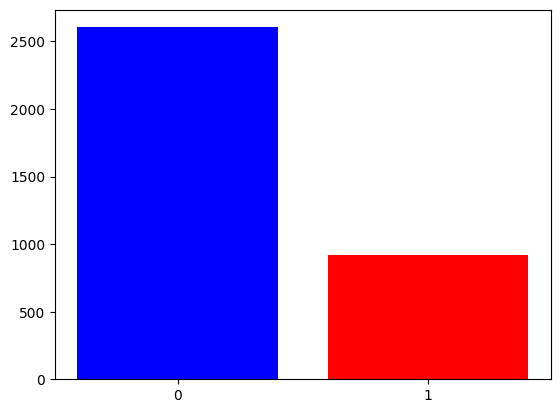

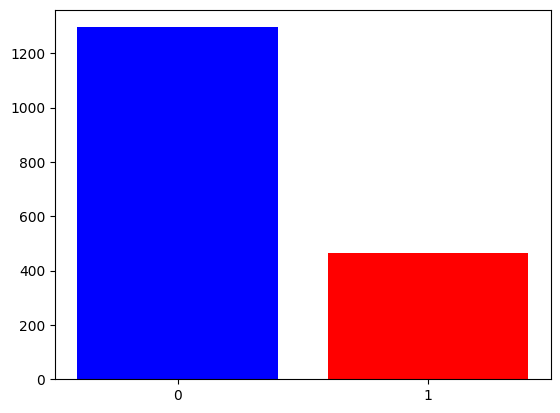

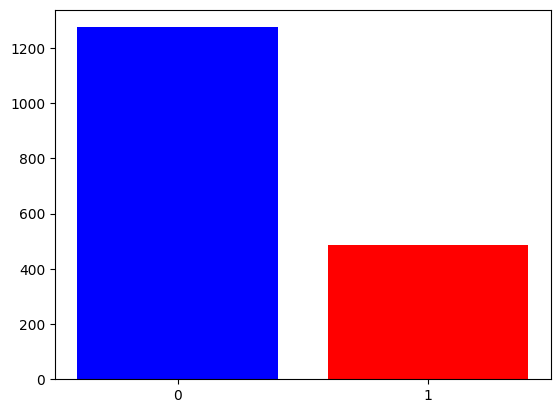

In [133]:
# Separando os dados de treino e teste. 50% dos dados serão usados para treino e 25% para teste e 25% para validação.
# Usar K-fold para validação cruzada
porcentagem = 0.5

df_treino = data[:int(len(data)*porcentagem)]
df_test_val = data[int(len(data)*porcentagem):]

df_validacao = df_test_val[int(len(df_test_val)*porcentagem):]
df_test = df_test_val[:int(len(df_test_val)*porcentagem)]


# Plotando a quantidade de dados de treino e teste.
plt.bar(['Treino', 'Teste', 'Validação'], [df_treino.shape[0], df_test.shape[0], df_validacao.shape[0]])
plt.show()

plt.bar(df_treino['Churn'].value_counts().index, df_treino['Churn'].value_counts(), color=['blue', 'red'])
plt.xticks([0, 1])
plt.show()

plt.bar(df_test['Churn'].value_counts().index, df_test['Churn'].value_counts(), color=['blue', 'red'])
plt.xticks([0, 1])
plt.show()

plt.bar(df_validacao['Churn'].value_counts().index, df_validacao['Churn'].value_counts(), color=['blue', 'red'])
plt.xticks([0, 1])
plt.show()


# Separando os dados de entrada e saída.
X_treino = df_treino.drop(columns=['Churn'])
y_treino = df_treino['Churn']

X_test = df_test.drop(columns=['Churn'])
y_test = df_test['Churn']

X_val = df_validacao.drop(columns=['Churn'])
y_val = df_validacao['Churn']


In [134]:
X_treino

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,-1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,0,0,0,0,3,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3517,0,0,1,0,70,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
3518,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3519,0,1,0,0,43,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [135]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_treino)
y_train = y_treino

X_val = scaler.transform(X_val)
y_val = y_val

X_test = scaler.transform(X_test)
y_test = y_test



In [136]:
X_train.shape

(3521, 26)

In [137]:
#Data Cleaning



# 4. Modeloos

### MLP

In [138]:
input_dim = X_train.shape[1]
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])



early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
111/111 [==============================] - 2s 9ms/step - loss: 0.4981 - accuracy: 0.7410 - precision: 0.5049 - recall: 0.2824 - val_loss: 0.4452 - val_accuracy: 0.7865 - val_precision: 0.6628 - val_recall: 0.4641
Epoch 2/100
111/111 [==============================] - 1s 10ms/step - loss: 0.4361 - accuracy: 0.7824 - precision: 0.6065 - recall: 0.4689 - val_loss: 0.4382 - val_accuracy: 0.7910 - val_precision: 0.6484 - val_recall: 0.5339
Epoch 3/100
111/111 [==============================] - 1s 8ms/step - loss: 0.4181 - accuracy: 0.7938 - precision: 0.6296 - recall: 0.5060 - val_loss: 0.4373 - val_accuracy: 0.7916 - val_precision: 0.6442 - val_recall: 0.5503
Epoch 4/100
111/111 [==============================] - 1s 9ms/step - loss: 0.4086 - accuracy: 0.7901 - precision: 0.6264 - recall: 0.4809 - val_loss: 0.4395 - val_accuracy: 0.7922 - val_precision: 0.6458 - val_recall: 0.5503
Epoch 5/100
111/111 [==============================] - 1s 11ms/step - loss: 0.4102 - accuracy: 0.79


Resultados no Teste:
- Acurácia: 0.7967
- Precisão: 0.6354
- Recall: 0.5398


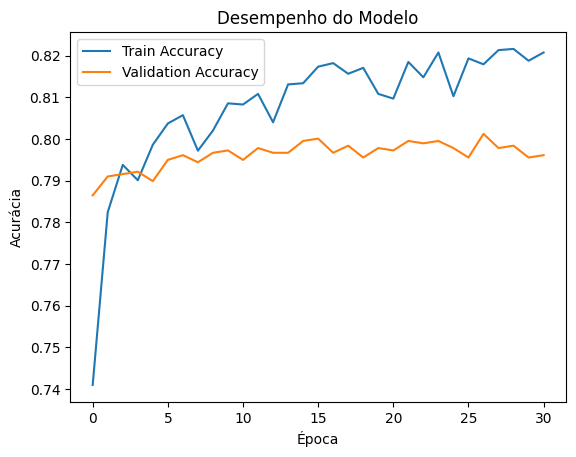

In [139]:
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f'''
Resultados no Teste:
- Acurácia: {test_results[1]:.4f}
- Precisão: {test_results[2]:.4f}
- Recall: {test_results[3]:.4f}''')

# 6. Visualização do Treinamento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Desempenho do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()
plt.show()

In [140]:
X_train


array([[ 1.0203722 , -0.43211178,  1.03733376, ...,  1.39426681,
        -0.88986376, -0.52861436],
       [-0.98003454, -0.43211178, -0.96400989, ...,  1.39426681,
        -0.88986376, -0.52861436],
       [-0.98003454, -0.43211178, -0.96400989, ...,  1.39426681,
        -0.88986376, -0.52861436],
       ...,
       [-0.98003454, -0.43211178, -0.96400989, ..., -0.71722284,
        -0.88986376,  1.89173825],
       [-0.98003454,  2.31421599, -0.96400989, ..., -0.71722284,
         1.12376753, -0.52861436],
       [ 1.0203722 , -0.43211178,  1.03733376, ..., -0.71722284,
        -0.88986376,  1.89173825]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
i

# Supondo que as variáveis X_train, y_train, X_val, y_val já estejam definidas conforme o pré-processamento do seu script
input_dim = X_train.shape[1]

def evaluate_model(model, X, y):
    # Predição das probabilidades
    y_pred_proba = model.predict(X, verbose=0)
    # Converter para 1D: shape (n_amostras,)
    y_pred = (y_pred_proba > 0.5).astype(int).ravel()
    # Converter y para numpy array 1D, se necessário
    y_true = y.to_numpy().ravel() if hasattr(y, "to_numpy") else np.array(y).ravel()

    # Cálculo das métricas
    accuracy = np.mean(y_pred == y_true)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc
    }

def objective(trial):
    model = Sequential()
    
    # Sugestão de hiperparâmetros
    n_layers = trial.suggest_int('n_layers', 1, 3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5, step=0.1)
    
    # Primeira camada com definição do input_dim
    units = trial.suggest_int('units_0', 16, 128, step=16)
    model.add(Dense(units, input_dim=input_dim, activation='relu'))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # Camadas ocultas adicionais
    for i in range(1, n_layers):
        units = trial.suggest_int(f'units_{i}', 16, 128, step=16)
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    # Camada de saída para classificação binária
    model.add(Dense(1, activation='sigmoid'))
    
    # Compilação do modelo
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss=BinaryCrossentropy(),
        metrics=[
            'accuracy',
            Precision(name='precision'),
            Recall(name='recall'),
            AUC(name='auc')
        ]
    )
    
    # Treinamento
    batch_size = trial.suggest_int('batch_size', 16, 128, step=16)
    callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )
    
    # Avaliação final do modelo
    val_metrics = evaluate_model(model, X_val, y_val)
    
    # Armazenar métricas adicionais no trial
    for metric_name, metric_value in val_metrics.items():
        trial.set_user_attr(f'val_{metric_name}', float(metric_value))
    
    # Retornamos o menor valor de loss de validação como métrica principal (minimização)
    best_val_ce = min(history.history['val_loss'])
    return best_val_ce

# Criação e execução do estudo com barra de progresso simplificada
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Exibindo os melhores hiperparâmetros e resultados
print("\nMelhores hiperparâmetros:")
print(study.best_params)

print("\nMelhores métricas de validação:")
print(f"Loss: {study.best_value:.4f}")
for key, value in study.best_trial.user_attrs.items():
    print(f"{key}: {value:.4f}")

# Preparando DataFrame com os resultados completos dos trials
trials_df = study.trials_dataframe()

# Adicionando colunas de métricas adicionais para melhor clareza
for metric in ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']:
    metric_key = f'user_attrs_val_{metric}'
    if metric_key in trials_df.columns:
        trials_df[f'val_{metric}'] = trials_df[metric_key]
        trials_df = trials_df.drop(columns=[metric_key])

# Salvando os resultados em um arquivo Excel
trials_df.to_excel('optuna_results_with_metrics.xlsx', index=False)
print("\nResultados completos dos testes do Optuna foram salvos em 'optuna_results_with_metrics.xlsx'")


In [4]:
metrics = pd.read_excel('optuna_results_with_metrics.xlsx')
metrics

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dropout_rate,params_learning_rate,params_n_layers,params_units_0,params_units_1,params_units_2,state,val_accuracy,val_precision,val_recall,val_f1_score,val_auc_roc
0,0,0.441566,2025-02-23 21:53:42.233,2025-02-23 21:53:53.133,0.000126,128,0.1,0.000117,3,128,64.0,16.0,COMPLETE,0.789892,0.637647,0.556468,0.594298,0.833463
1,1,0.438416,2025-02-23 21:53:53.141,2025-02-23 21:54:08.080,0.000173,32,0.2,0.000166,2,112,80.0,NaN,COMPLETE,0.792731,0.656410,0.525667,0.583808,0.833727
2,2,0.446357,2025-02-23 21:54:08.090,2025-02-23 21:54:15.814,0.000089,128,0.1,0.000195,3,96,128.0,32.0,COMPLETE,0.789892,0.645161,0.533881,0.584270,0.829385
3,3,0.445582,2025-02-23 21:54:15.822,2025-02-23 21:54:26.482,0.000123,128,0.1,0.000174,3,80,128.0,112.0,COMPLETE,0.787053,0.634615,0.542094,0.584718,0.830151
4,4,0.446058,2025-02-23 21:54:26.490,2025-02-23 21:54:37.020,0.000122,112,0.0,0.000162,3,48,48.0,16.0,COMPLETE,0.793867,0.665775,0.511294,0.578397,0.828616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.432429,2025-02-24 00:26:08.316,2025-02-24 00:26:18.943,0.000123,48,0.3,0.002501,3,64,16.0,48.0,COMPLETE,0.793299,0.652605,0.540041,0.591011,0.837033
496,496,0.437448,2025-02-24 00:26:18.950,2025-02-24 00:26:25.187,0.000072,112,0.3,0.003120,3,64,48.0,48.0,COMPLETE,0.793867,0.646919,0.560575,0.600660,0.834860
497,497,0.435829,2025-02-24 00:26:25.192,2025-02-24 00:26:40.299,0.000175,48,0.3,0.002632,3,64,16.0,48.0,COMPLETE,0.799546,0.691429,0.496920,0.578256,0.839137
498,498,0.428889,2025-02-24 00:26:40.307,2025-02-24 00:26:52.002,0.000135,48,0.3,0.003084,3,64,16.0,48.0,COMPLETE,0.797842,0.669251,0.531828,0.592677,0.840622


### KAN

In [ ]:
from Kantf import KAN

model = KAN([
    {'in_features': 784, 'out_features': 64, 'grid_size': 5, 'spline_order': 3, 'activation': 'silu'},
    {'in_features': 64, 'out_features': 10, 'grid_size': 5, 'spline_order': 3, 'activation': 'silu'}
])

2025-02-17 10:55:56.278223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 10:55:56.400139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 10:55:56.403114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 10:55:56.406021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True))

# Metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = SparseCategoricalAccuracy(name='val_accuracy')

# Lists to store metrics for plotting
epoch_train_loss = []
epoch_val_loss = []
epoch_val_accuracy = []

for epoch in range(epochs):
    train_loss.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()

    # Existing training and validation loop here ...

    # Append metrics after each epoch
    epoch_train_loss.append(train_loss.result().numpy())
    epoch_val_loss.append(val_loss.result().numpy())
    epoch_val_accuracy.append(val_accuracy.result().numpy())

    print(f'Epoch {epoch + 1}, Train Loss: {train_loss.result():.4f}, Validation Loss: {val_loss.result():.4f}, Validation Accuracy: {val_accuracy.result():.4f}')

NameError: name 'epochs' is not defined